# STEP 6: Calculate zonal statistics

In order to evaluate the connection between vegetation health and
redlining, we need to summarize NDVI across the same geographic areas as
we have redlining information.

First, import variables from previous notebooks:

In [1]:
store -r denver_redlining_gdf denver_ndvi_da

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Some packages are included that will help you calculate statistics
for areas imported below. Add packages for:</p>
<ol type="1">
<li>Interactive plotting of tabular and vector data</li>
<li>Working with categorical data in <code>DataFrame</code>s</li>
</ol></div></div>

In [2]:
import hvplot.pandas # Interactive plots with pandas
import pandas as pd # Ordered categorical data
import regionmask # Convert shapefile to mask
from xrspatial import zonal_stats # Calculate zonal statistics
import rioxarray


/Users/erinzimmerman/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert vector to raster</div></div><div class="callout-body-container callout-body"><p>You can convert your vector data to a raster mask using the
<code>regionmask</code> package. You will need to give
<code>regionmask</code> the geographic coordinates of the grid you are
using for this to work:</p>
<ol type="1">
<li>Replace <code>gdf</code> with your redlining
<code>GeoDataFrame</code>.</li>
<li>Add code to put your <code>GeoDataFrame</code> in the same CRS as
your raster data.</li>
<li>Replace <code>x_coord</code> and <code>y_coord</code> with the x and
y coordinates from your raster data.</li>
</ol></div></div>

In [8]:
denver_ndvi_da.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]')

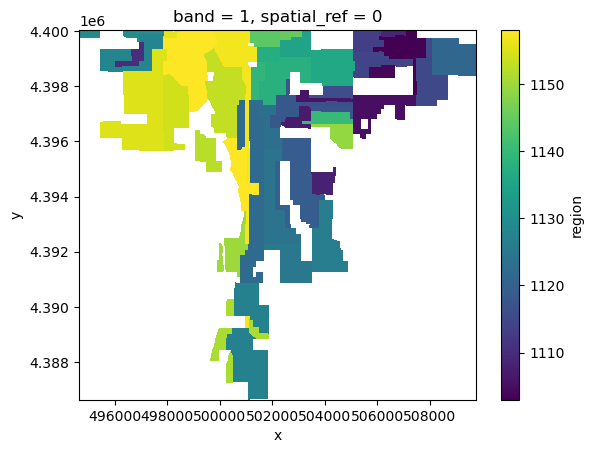

In [3]:
denver_redlining_mask = regionmask.mask_geopandas(
    denver_redlining_gdf.to_crs(denver_ndvi_da.rio.crs),
    denver_ndvi_da.x, denver_ndvi_da.y,
    # The regions do not overlap
    overlap=False,
    # We're not using geographic coordinates
    wrap_lon=False
)

denver_redlining_mask.plot()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate zonal statistics</div></div><div class="callout-body-container callout-body"><p>Calculate zonal status using the <code>zonal_stats()</code> function.
To figure out which arguments it needs, use either the
<code>help()</code> function in Python, or search the internet.</p></div></div>

In [4]:
help(zonal_stats)

Help on function stats in module xrspatial.zonal:

stats(zones: xarray.core.dataarray.DataArray, values: xarray.core.dataarray.DataArray, zone_ids: Optional[List[Union[int, float]]] = None, stats_funcs: Union[Dict, List] = ['mean', 'max', 'min', 'sum', 'std', 'var', 'count'], nodata_values: Union[int, float] = None, return_type: str = 'pandas.DataFrame') -> Union[pandas.core.frame.DataFrame, dask.dataframe.core.DataFrame, xarray.core.dataarray.DataArray]
    Calculate summary statistics for each zone defined by a `zones`
    dataset, based on `values` aggregate.
    
    A single output value is computed for every zone in the input `zones`
    dataset.
    
    This function currently supports numpy backed, and dask with numpy backed
    xarray DataArrays.
    
    Parameters
    ----------
    zones : xr.DataArray
        zones is a 2D xarray DataArray of numeric values.
        A zone is all the cells in a raster that have the same value,
        whether or not they are contiguous. T

In [5]:
# Calculate NDVI stats for each redlining zone
denver_ndvi_stats = zonal_stats(denver_redlining_mask, denver_ndvi_da)

print(denver_ndvi_stats)

      zone      mean       max       min          sum       std       var  \
0   1103.0  0.694627  0.975424  0.232406  1266.304565  0.083890  0.007037   
1   1104.0  0.652956  0.800656  0.461446   323.866058  0.058149  0.003381   
2   1105.0  0.659457  0.933401  0.135010  1460.038574  0.103756  0.010765   
3   1106.0  0.705933  0.895803  0.235602   331.788544  0.070042  0.004906   
4   1107.0  0.672849  0.859561  0.154306   411.783569  0.093026  0.008654   
5   1108.0  0.654632  0.955230  0.314218   500.138519  0.087687  0.007689   
6   1109.0  0.681788  0.954300  0.247301   150.675217  0.073440  0.005393   
7   1110.0  0.478369  0.886589  0.098334   212.396027  0.118690  0.014087   
8   1113.0  0.670165  0.921969  0.241186   592.425598  0.100674  0.010135   
9   1114.0  0.554470  0.996352  0.117987   708.057739  0.157045  0.024663   
10  1115.0  0.647453  0.915437  0.148359  1273.540283  0.107305  0.011514   
11  1116.0  0.639449  1.905447  0.153909   617.707886  0.115872  0.013426   

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot regional statistics</div></div><div class="callout-body-container callout-body"><p>Plot the regional statistics:</p>
<ol type="1">
<li>Merge the NDVI values into the redlining
<code>GeoDataFrame</code>.</li>
<li>Use the code template below to convert the <code>grade</code> column
(<code>str</code> or <code>object</code> type) to an ordered
<code>pd.Categorical</code> type. This will let you use ordered color
maps with the grade data!</li>
<li>Drop all <code>NA</code> grade values.</li>
<li>Plot the NDVI and the redlining grade next to each other in linked
subplots.</li>
</ol></div></div>

In [6]:
# Merge the NDVI stats with redlining geometry into one `GeoDataFrame`
denver_redlining_ndvi_gdf = denver_redlining_gdf.merge(
    denver_ndvi_stats.set_index('zone'),
    left_index=True, right_index=True)

# Change grade to ordered Categorical for plotting
denver_redlining_ndvi_gdf.grade = pd.Categorical(
    denver_redlining_ndvi_gdf.grade,
    ordered=True,
    categories=['A', 'B', 'C', 'D']
)

# Drop rows with NA grades
denver_redlining_ndvi_gdf = denver_redlining_ndvi_gdf.dropna()

# Plot NDVI and redlining grade in linked subplots

(
    denver_redlining_ndvi_gdf.hvplot(
        c='mean',
        geo=True,
        cmap='Greens')
    +
    denver_redlining_ndvi_gdf.hvplot(
        c='grade',
        geo=True,
        cmap='Reds')
)

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (mean)
   .Polygons.II :Polygons   [Longitude,Latitude]   (grade)

In [7]:
store denver_redlining_ndvi_gdf

Stored 'denver_redlining_ndvi_gdf' (GeoDataFrame)
